In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('athletes.csv')

In [4]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


<AxesSubplot:ylabel='Frequency'>

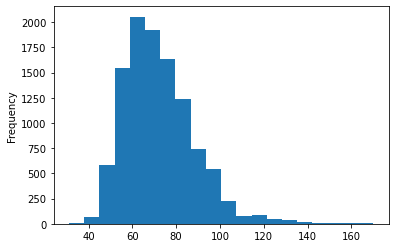

In [12]:
df['weight'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

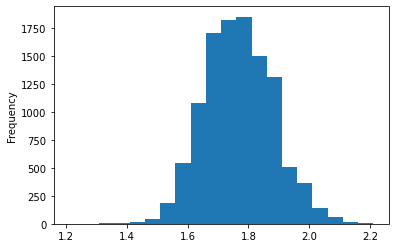

In [13]:
df['height'].plot(kind='hist', bins=20)

In [21]:
df_O = df.fillna(0)
df_O[df_O.weight == 0]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,0.00,0.0,aquatics,0,0,0
28,349871091,Abdelhafid Benchabla,ALG,male,9/26/86,1.86,0.0,boxing,0,0,0
30,23564778,Abdelkader Chadi,ALG,male,12/12/86,1.78,0.0,boxing,0,0,0
37,934545704,Abdelrahman Salah Orabi Abdelgawwad,EGY,male,10/9/87,1.85,0.0,boxing,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,0.00,0.0,athletics,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11465,980866226,Zhaina Shekerbekova,KAZ,female,12/17/89,1.54,0.0,boxing,0,0,0
11468,405483135,Zhanibek Alimkhanuly,KAZ,male,4/1/93,1.82,0.0,boxing,0,0,0
11513,352983859,Zohir Kedache,ALG,male,3/2/86,1.78,0.0,boxing,0,0,0
11514,424586991,Zohra Ez Zahraoui,MAR,female,11/18/83,1.65,0.0,boxing,0,0,0


In [ ]:
data = df.dropna()

Расспределние нормальное, пропущенных значений немного, можно их удалить.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
data.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [40]:
X = data[['height', 'weight', 'sport',
       'gold', 'silver', 'bronze']]

In [37]:
X = data[['height', 'weight',
       'gold', 'silver', 'bronze']]

In [41]:
X = pd.get_dummies(X, columns = ['sport'])
X.head()

,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
le = LabelEncoder()
le.fit(data['sex'])
y = pd.Series( data = le.transform(data['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
model.score(X_test, y_test)

0.7951197053406999

In [46]:
predicts =  model.predict_proba(X_test)

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [52]:
fpr, tpr, thres = roc_curve( y_test, predicts[:, 1])

In [53]:
from matplotlib import pyplot as plt

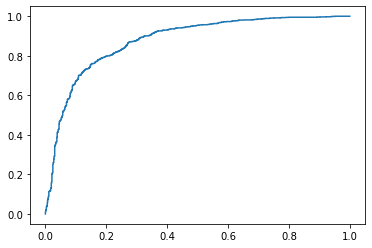

In [54]:
plt.plot( fpr, tpr )

In [56]:
roc_auc_score(y_test, predicts[:, 1])

0.8773036941227998

In [76]:
def TPR_FPR(pred, abroad):
    tp = 0
    fp = 0
    fn = 0
    tn = 0

    for predicted_prob, actual in pred:
        if predicted_prob >= abroad:
            predicted = 1
        else:
            predicted = 0
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        if predicted == 0:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    TPR = tp / (tp + fn)
    FPR = fp / (fp + tn)
    return (TPR, FPR)

In [81]:
pred = list(zip(predicts[:, 1], y_test))

In [82]:
TPR_FPR(pred, abroad = 0.5)

(0.8148148148148148, 0.22865853658536586)

In [109]:
abroad = 0
TPR = []
FPR = []
for i in range(99):
    res = TPR_FPR(pred, abroad)
    TPR.append(res[0])
    FPR.append(res[1])
    abroad += 0.01

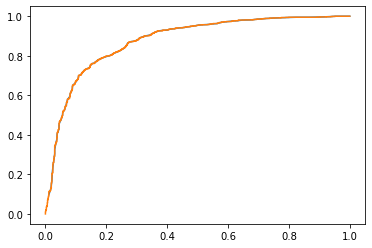

In [110]:
plt.plot( FPR, TPR )
plt.plot( fpr, tpr )

ROC кривая для метода из sklearn и вручную сделанной полностью совпадают. Если судить по форме графика(стремится к квадарту) и площади под графиком(близка к 1), то мы можем сказать, что модель довольно неплохо предсказывает классы(пол).

Мне думается, что ROC кривая может быть ниже диагонали, только если впервую очередь оценивается FPR, что равносильно поменять местами на графике 2 показателя. Только по смыслу это будет тоже самое, но менее интуитивно понятное представление. В силу других причин быть не может, так как в этой метрике самый худший показатель это когда идёт диагональ или плошадь 0.5, что обазначает полную случайность предсказаний.

In [87]:
def Precision_Recall(pred, abroad):
    tp = 0
    fp = 0
    fn = 0
    tn = 0

    for predicted_prob, actual in pred:
        if predicted_prob >= abroad:
            predicted = 1
        else:
            predicted = 0
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        if predicted == 0:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return (precision, recall)

In [103]:
abroad = 0
precision = []
recall = []
for i in range(999):
    res = Precision_Recall(pred, abroad)
    precision.append(res[0])
    recall.append(res[1])
    abroad += 0.001

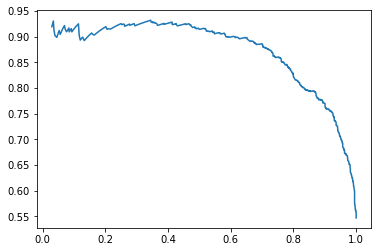

In [107]:
plt.plot(recall, precision)

In [96]:
from sklearn.metrics import precision_recall_curve

In [97]:
pr, re, thres = precision_recall_curve( y_test, predicts[:, 1] )

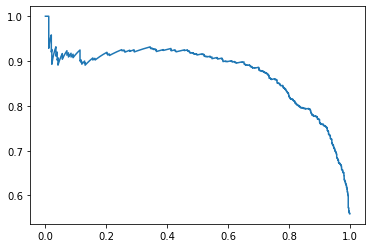

In [106]:
plt.plot(re, pr)

PR кривая относительно имеет площадь ближе к 1, так что можно скзать, модель не иделаьно, но более менее правильно предсказывает. Графики для встроенного метода и вручную сделанных практически совпадают, только почему то не заципилось на оси ординат последнее 5%.

На основе метрик можно сделать вывод, что модель в принципе неплохо справляется с предсказанием пола спортсмена. Сорее всего это связано с тем, что эти 2 класса имееют выраженные отличия, и если в теории на гарфике изобразить их расспеределения, то они будут слабо пересекаться. Плюс эти 2 класса равнозначны(по размеру). В случае предсказания других показателей(есть золотые медали или нет), то это надо проверять.